In [113]:
import numpy as np
import matplotlib.pyplot as plt
# 로지스틱 회귀

In [114]:
def sigmoid(x):
  return 1/(1+np.exp(-x))


In [115]:
x=np.arange(-5,5,0.1)
y=sigmoid(x)
y

array([0.00669285, 0.00739154, 0.00816257, 0.0090133 , 0.0099518 ,
       0.01098694, 0.01212843, 0.01338692, 0.01477403, 0.0163025 ,
       0.01798621, 0.01984031, 0.02188127, 0.02412702, 0.02659699,
       0.02931223, 0.03229546, 0.03557119, 0.03916572, 0.04310725,
       0.04742587, 0.05215356, 0.05732418, 0.06297336, 0.06913842,
       0.07585818, 0.0831727 , 0.09112296, 0.09975049, 0.10909682,
       0.11920292, 0.13010847, 0.14185106, 0.15446527, 0.16798161,
       0.18242552, 0.19781611, 0.21416502, 0.23147522, 0.24973989,
       0.26894142, 0.2890505 , 0.31002552, 0.33181223, 0.35434369,
       0.37754067, 0.40131234, 0.42555748, 0.450166  , 0.47502081,
       0.5       , 0.52497919, 0.549834  , 0.57444252, 0.59868766,
       0.62245933, 0.64565631, 0.66818777, 0.68997448, 0.7109495 ,
       0.73105858, 0.75026011, 0.76852478, 0.78583498, 0.80218389,
       0.81757448, 0.83201839, 0.84553473, 0.85814894, 0.86989153,
       0.88079708, 0.89090318, 0.90024951, 0.90887704, 0.91682

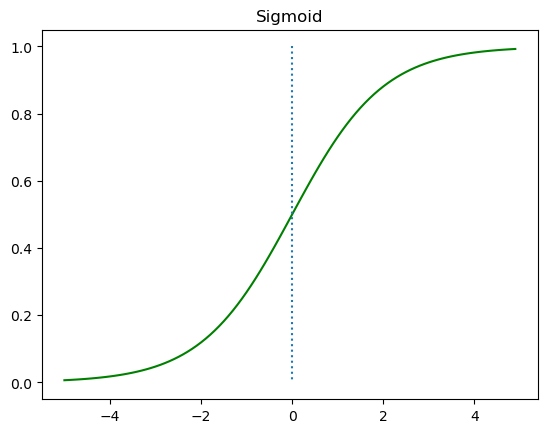

In [116]:
plt.plot(x,y,'g')
plt.plot([0,0],[1.0,0.0],':')
plt.title('Sigmoid')
plt.show()

In [117]:
y1=sigmoid(0.5*x)
y2=sigmoid(x)
y3=sigmoid(2*x)


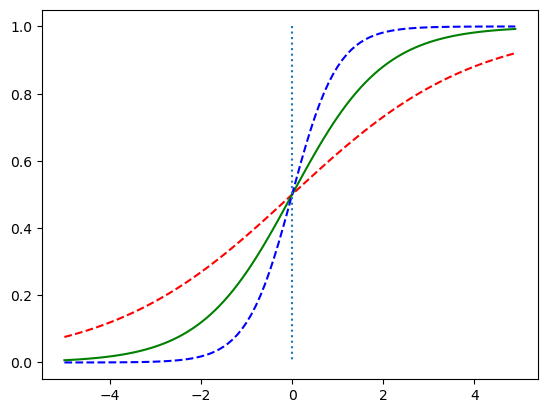

In [118]:
y1=sigmoid(0.5*x)
y2=sigmoid(x)
y3=sigmoid(2*x)
plt.plot(x,y1,'r',linestyle='--')
plt.plot(x,y2,'g')
plt.plot(x,y3,'b',linestyle='--')
plt.plot([0,0],[1.0,0.0],':')
plt.show()



In [119]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
# 딥러닝용 모델링이므로 앞서 머신러닝시 수행단계 줄음

In [120]:
torch.manual_seed(1)
x_data=[[1,2],[2,3],[3,1],[4,3],[5,3],[6,2]]
t_data=[[0],[0],[0],[1],[1],[1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(t_data)
print(x_train.size())
print(y_train.size())

torch.Size([6, 2])
torch.Size([6, 1])


In [121]:
w=torch.zeros((2,1),requires_grad=True)
b=torch.zeros(1,requires_grad=True)
# oprimizer w와b 생성 된거 들고와도됩니당
oprimizer=optim.SGD([w,b],lr=0.1)
costs=[]


In [122]:
# 손실함수 구하는 과정이 앞서 선형회귀와 전혀다름!
for epoch in range(2001):
  # 회귀식 y
  y=x_train.matmul(w)+b
  h=torch.sigmoid(y)
  #로지스터의 손실구하기
  cost=-(y_train*torch.log(h) + (1-y_train)*torch.log(1-h)).mean()

  oprimizer.zero_grad()
  cost.backward()
  oprimizer.step()
  costs.append(cost.item())

  if epoch % 100 == 0 :
    print('epoch:',epoch,'cost',cost.item()) 

epoch: 0 cost 0.6931471824645996
epoch: 100 cost 0.41432666778564453
epoch: 200 cost 0.34952056407928467
epoch: 300 cost 0.3013016879558563


epoch: 400 cost 0.26353225111961365
epoch: 500 cost 0.23351818323135376
epoch: 600 cost 0.20931296050548553
epoch: 700 cost 0.1894957274198532
epoch: 800 cost 0.17303510010242462
epoch: 900 cost 0.15917940437793732
epoch: 1000 cost 0.14737461507320404
epoch: 1100 cost 0.1372075080871582
epoch: 1200 cost 0.1283654123544693
epoch: 1300 cost 0.12060842663049698
epoch: 1400 cost 0.1137501522898674
epoch: 1500 cost 0.10764380544424057
epoch: 1600 cost 0.10217245668172836
epoch: 1700 cost 0.0972420871257782
epoch: 1800 cost 0.09277603030204773
epoch: 1900 cost 0.08871141821146011
epoch: 2000 cost 0.08499626070261002


In [123]:
# w와b 갱신이 되어있을것 
h2=torch.sigmoid(x_train.matmul(w)+b)
h2

tensor([[0.0090],
        [0.1106],
        [0.1721],
        [0.8510],
        [0.9748],
        [0.9924]], grad_fn=<SigmoidBackward0>)

In [124]:
predict=(h2>torch.FloatTensor([0.5])).float()
print(predict)
# 0.5 기준으로 0 과 1 
print(w)
print(b)

tensor([[0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.]])
tensor([[1.9133],
        [0.6997]], requires_grad=True)
tensor([-8.0102], requires_grad=True)


In [125]:
model=nn.Sequential(
  nn.Linear(2,1),
  nn.Sigmoid()
)
model(x_train)

tensor([[0.4020],
        [0.4147],
        [0.6556],
        [0.5948],
        [0.6788],
        [0.8061]], grad_fn=<SigmoidBackward0>)

In [126]:
optimizer=optim.SGD(model.parameters(),lr=0.1)

for epoch in range(501):
  # 직선의 방정식에 해당하는 가설 
  # H(x) 계산 y=wx+b
  prediction=model(x_train) 
  # error의 제곱으로 손실
  cost=F.mse_loss(prediction,y_train)
  #gradient 0으로 초기화하기 안하면 미분 계속 누적됩니다 
  optimizer.zero_grad()
  # backward 적용연산 
  cost.backward()
  # w,b 업데이트
  optimizer.step()

  if  epoch % 10 == 0:
    prediction = h >= torch.FloatTensor([0.5]) # 예측값이 0.5를 넘으면 True로 간주 
    correct_prediction = prediction.float() == y_train # 실제값과 일치하는 경우만 True로 간주 
    accuracy = correct_prediction.sum().item() / len(correct_prediction) # 정확도를 계산 
    print('Epoch',epoch,'cost',cost.item(),'Accuracy',accuracy*100)
  



Epoch 0 cost 0.17805898189544678 Accuracy 100.0
Epoch 10 cost 0.17231756448745728 Accuracy 100.0
Epoch 20 cost 0.1676461100578308 Accuracy 100.0
Epoch 30 cost 0.16370035707950592 Accuracy 100.0
Epoch 40 cost 0.16030849516391754 Accuracy 100.0
Epoch 50 cost 0.15734396874904633 Accuracy 100.0
Epoch 60 cost 0.15471267700195312 Accuracy 100.0
Epoch 70 cost 0.15234409272670746 Accuracy 100.0
Epoch 80 cost 0.1501845270395279 Accuracy 100.0
Epoch 90 cost 0.1481928527355194 Accuracy 100.0
Epoch 100 cost 0.1463371068239212 Accuracy 100.0
Epoch 110 cost 0.14459221065044403 Accuracy 100.0
Epoch 120 cost 0.14293839037418365 Accuracy 100.0
Epoch 130 cost 0.14135979115962982 Accuracy 100.0
Epoch 140 cost 0.13984368741512299 Accuracy 100.0
Epoch 150 cost 0.13837985694408417 Accuracy 100.0
Epoch 160 cost 0.13695992529392242 Accuracy 100.0
Epoch 170 cost 0.13557712733745575 Accuracy 100.0
Epoch 180 cost 0.13422586023807526 Accuracy 100.0
Epoch 190 cost 0.1329016536474228 Accuracy 100.0
Epoch 200 cost 0

Epoch 420 cost 0.1062082052230835 Accuracy 100.0
Epoch 430 cost 0.10517364740371704 Accuracy 100.0
Epoch 440 cost 0.10415005683898926 Accuracy 100.0
Epoch 450 cost 0.1031375303864479 Accuracy 100.0
Epoch 460 cost 0.10213615745306015 Accuracy 100.0
Epoch 470 cost 0.10114606469869614 Accuracy 100.0
Epoch 480 cost 0.10016733407974243 Accuracy 100.0
Epoch 490 cost 0.09919998794794083 Accuracy 100.0
Epoch 500 cost 0.0982440933585167 Accuracy 100.0


In [127]:
(model(torch.FloatTensor([[3,1],[8,5]]))>torch.FloatTensor([0.5])).float()

tensor([[1.],
        [1.]])

In [138]:
#AND게이트
x_data=torch.FloatTensor([[0,0],[0,1],[1,0],[1,1]])
y_data=torch.FloatTensor([[0],[0],[0],[1]])


model=nn.Sequential(nn.Linear(2,1),nn.Sigmoid())
optimizer = optim.SGD(model.parameters(),lr=0.1)

for epoch in range(1000):
  h=model(x_data)
  cost=F.binary_cross_entropy(h, y_data)

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()
  
  if epoch % 100 == 0:
    prediction = h >= torch.FloatTensor([0.5]) # 예측값이 0.5를 넘으면 True로 간주 
    correct_prediction = prediction == y_data # 실제값과 일치하는 경우만 True로 간주 
    accuracy = correct_prediction.sum().item() / len(correct_prediction) # 정확도를 계산 true만 sum
    print('Epoch',epoch,'cost',cost.item(),'Accuracy',accuracy*100)
    


Epoch 0 cost 0.920535683631897 Accuracy 25.0
Epoch 100 cost 0.4501699209213257 Accuracy 75.0
Epoch 200 cost 0.3557611405849457 Accuracy 100.0
Epoch 300 cost 0.2967694401741028 Accuracy 100.0
Epoch 400 cost 0.25585299730300903 Accuracy 100.0
Epoch 500 cost 0.22543922066688538 Accuracy 100.0
Epoch 600 cost 0.2017425298690796 Accuracy 100.0
Epoch 700 cost 0.18265323340892792 Accuracy 100.0
Epoch 800 cost 0.16689130663871765 Accuracy 100.0
Epoch 900 cost 0.15362748503684998 Accuracy 100.0
Epoch 0 cost 0.7490237951278687 Accuracy 75.0
Epoch 100 cost 0.5046229362487793 Accuracy 75.0
Epoch 200 cost 0.38732603192329407 Accuracy 100.0
Epoch 300 cost 0.31748032569885254 Accuracy 100.0
Epoch 400 cost 0.27066630125045776 Accuracy 100.0
Epoch 500 cost 0.23666918277740479 Accuracy 100.0
Epoch 600 cost 0.2106083780527115 Accuracy 100.0
Epoch 700 cost 0.18986189365386963 Accuracy 100.0
Epoch 800 cost 0.1728845238685608 Accuracy 100.0
Epoch 900 cost 0.15869766473770142 Accuracy 100.0
Epoch 0 cost 0.818

In [139]:
(model(x_data)>torch.FloatTensor([0.5])).float()

tensor([[0.],
        [0.],
        [0.],
        [1.]])

In [ ]:
# OR게이트 
# 수정
x_data=torch.FloatTensor([[0,0],[0,1],[1,0],[1,1]])
y_data=torch.FloatTensor([[0],[0],[0],[1]])


model=nn.Sequential(nn.Linear(2,1),nn.Sigmoid())
optimizer = optim.SGD(model.parameters(),lr=0.1)

for epoch in range(1000):
  h=model(x_data)
  cost=F.binary_cross_entropy(h, y_data)

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()
  
  if epoch % 100 == 0:
    prediction = h >= torch.FloatTensor([0.5]) # 예측값이 0.5를 넘으면 True로 간주 
    correct_prediction = prediction == y_data # 실제값과 일치하는 경우만 True로 간주 
    accuracy = correct_prediction.sum().item() / len(correct_prediction) # 정확도를 계산 
    print('Epoch',epoch,'cost',cost.item(),'Accuracy',accuracy*100)




In [ ]:
#NAND 게이트
x_data=torch.FloatTensor([[0,0],[0,1],[1,0],[1,1]])
y_data=torch.FloatTensor([[0],[0],[0],[1]])

model=nn.Sequential(nn.Linear(2,1),nn.Sigmoid())
optimizer = optim.SGD(model.parameters(),lr=0.1)

for epoch in range(1000):
  h=model(x_data)
  cost=F.binary_cross_entropy(h, y_data)

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()
  
  if epoch % 100 == 0:
    prediction = h >= torch.FloatTensor([0.5]) # 예측값이 0.5를 넘으면 True로 간주 
    correct_prediction = prediction != y_data # 실제값과 일치하는 경우만 True로 간주 
    accuracy = correct_prediction.sum().item() / len(correct_prediction) # 정확도를 계산 
    print('Epoch',epoch,'cost',cost.item(),'Accuracy',accuracy*100)



In [ ]:
# 이 경우는 구분 직선의 경우의 수가 복수로 있어야하기때문에 
# 결과가 도움적이지 못함-하지만 단을 그만큼 복수적으로 생성한다면(NAND,OR 출력값을 복합 결합)
#   ㄴ해결 방안

#XOR게이트
x_data=torch.FloatTensor([[0,0],[0,1],[1,0],[1,1]])
y_data=torch.FloatTensor([[0],[0],[0],[1]])


model=nn.Sequential(nn.Linear(2,1),nn.Sigmoid())
optimizer = optim.SGD(model.parameters(),lr=0.1)

for epoch in range(500):
  h=model(x_data)
  cost=F.binary_cross_entropy(h,y_data)

  op